In [1]:
import mglearn
import matplotlib.pyplot as plt
import  pandas as pd 
import numpy as np
from IPython.display import display 

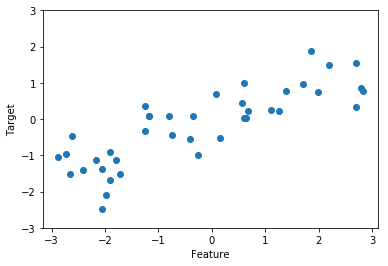

In [83]:
#Load dataset and plot 
X, y = mglearn.datasets.make_wave(n_samples=40)
plt.plot(X,y,'o')
plt.ylim(-3,3)
plt.xlabel("Feature")
plt.ylabel("Target")
plt.show()

In [6]:
#check size of training data 
print("size of X: {}".format(X.size))
print("size of y: {}".format(y.size))


size of X: 40
size of y: 40


In [204]:
#set alpha for gradient descent (step size)
alpha = .1

In [8]:
#add column of ones to training set 
col_ones = np.ones((40,1))
X_new = np.append(col_ones,X,axis=1)
X_new.shape
#create variable m which is the number of training examples 
m = X.size

In [9]:
#create empty matrix that will be filled with costs for each iteraton of gradient descent 
J_history = np.zeros((1,25))

In [10]:
#make y a matrix which will make matrix computations easier 
y.shape
y_new=np.asmatrix(y).transpose()
#create Theta vector for parameters 
Theta = np.zeros((2,1))
#Create Temp_Theta vector to store Theta updates in gradient descent 
Temp_Theta = np.zeros((2,1))
print(Theta)

[[ 0.]
 [ 0.]]


In [11]:
#function to compute the cost with given choice of Theta 
def ComputeCost(X,y,theta):
    J=0
    for i in range(0,m):
        J = J + (((np.dot(theta.transpose(),X_new[i,:].transpose())-y[i])**2)/(2*m))
        
    return J

In [127]:
#The first for loop loops over the number of iterations of gradient descent
#The inner for loop computes partial derivative and updates Theta values simultaneously 
#J_history calls ComputeCost() function and keeps track of the cost for each iteration 
for iters in range(0,25):
    for i in range(0,X_new[0,:].size):
        Temp_Theta[i] = Theta[i]-(alpha)*np.dot(((np.dot(X_new,Theta)-y_new).transpose()),X_new[:,i])/m
    Theta = Temp_Theta
    J_history[0,iters] = ComputeCost(X,y_new,Theta)

In [128]:
#print optimal Theta values found above 
Theta
#create val array which will be filled with our predicted values 
val = np.zeros((40,1))
#sanity check- confirm cost is decreasing over iterations
print(J_history[0,0])
print(J_history[0,24])

0.163514063356
0.163514063202


In [129]:
#calculate predicted values 
for j in range(0,40):
    val[j] = Theta[0]+Theta[1]*X[j]

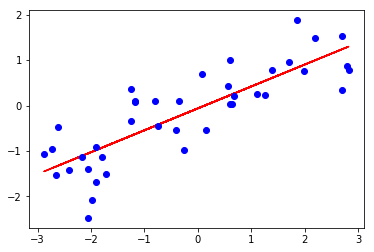

In [163]:
#plot prediceted values and original training data 
plt.plot(X,val,'r-')
plt.plot(X,y,'bo')
plt.show()

In [206]:
print(Theta)

[[-0.06188057]
 [ 0.4820613 ]]


In [142]:
#load linear regression from sklearn- we will confirm our answers found above 
from sklearn.linear_model import LinearRegression

In [21]:
#load dataset 
X,y = mglearn.datasets.make_wave(n_samples=40)

In [22]:
#train model 
lr = LinearRegression().fit(X,y)

In [23]:
#print paramaeters found from model- these should match our Theta matrix above 
print(lr.coef_)
print(lr.intercept_)

[ 0.48206114]
-0.0618821003468
